<a href="https://colab.research.google.com/github/HardikxLabeitazer/DataScience-Practice-/blob/master/LinearRegressionMultipleVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/LinearRegression/homeprices3.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
import math

median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [6]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [30]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [14]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [15]:
reg.intercept_

221323.00186540396

In [19]:
reg.predict([[3000,3,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([579201.19929613])

In [18]:
reg.score(df[['area','bedrooms','age']],df.price)

0.9550196399325821

In [31]:
reg.predict([[2500,4,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])

In [34]:
salarydata = pd.read_csv("/content/drive/MyDrive/MachineLearning/LinearRegression/salary_data.csv")
salarydata.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


This is the Single Variable Data Set not the multiple one.

In [36]:
salarydata.shape

(30, 2)

In [38]:
salarydata.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
X = salarydata[['YearsExperience']]
Y=salarydata['Salary']
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [42]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)


In [45]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [47]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


Text(0.5, 1.0, 'Salary vs Experience')

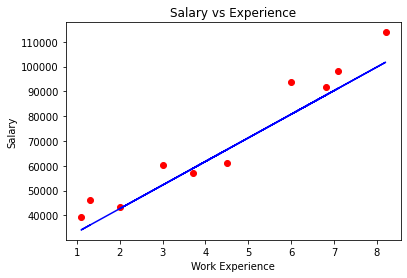

In [50]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,test_data_prediction,color="blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")

In [51]:
model.score(X_test,Y_test)

0.9041801644162628

Multiple Linear Regression


In [67]:
hiring = pd.read_csv("/content/drive/MyDrive/MachineLearning/LinearRegression/hiring.csv")
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [68]:
mediantestscore = math.floor(hiring['test_score(out of 10)'].median())
hiring['test_score(out of 10)'] = hiring['test_score(out of 10)'].fillna(mediantestscore)
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [69]:
hiring['experience'] = hiring['experience'].fillna("zero")
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [56]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=7edfeb7d06b1d1fac2b12e2eca1d30f118c6e77f38e8a3ff402a6f4acaac63e4
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [57]:
from word2number import w2n

In [71]:
hiring['experience']=hiring['experience'].apply(w2n.word_to_num)
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [72]:
model2 = linear_model.LinearRegression()
model2.fit(hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring['salary($)'])

LinearRegression()

In [73]:
model2.predict([[2,9,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53205.96797671])

In [74]:
model2.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92002.18340611])

Text(0.5, 1.0, 'Salary vs Experience')

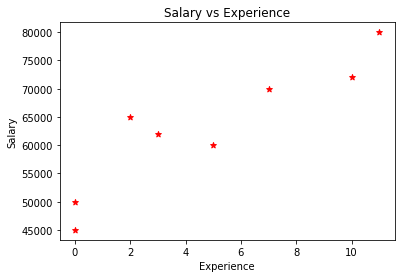

In [78]:
plt.scatter(hiring[['experience']],hiring['salary($)'],color="red",marker="*")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
